In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [4]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20200101", "00_Sea_level_correction_pressure.parquet.gzip")

data = pd.read_parquet(datafile_path)
data /= 100

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,692.654602,692.517029,692.377197,692.235229,692.091187,691.945007,691.796875,691.646790,691.494751,691.340942,...,693.896484,693.783997,693.668762,693.550781,693.430298,693.307190,693.181458,693.053345,692.922791,692.789856
-88.3125,704.050720,703.562683,703.052917,702.482117,701.907410,701.328979,700.747131,700.161926,699.573853,698.982788,...,708.172485,707.804199,707.429993,707.050049,706.664429,706.273438,705.877014,705.475525,705.015808,704.535156
-87.1875,708.497986,707.689209,706.879272,706.068420,705.256958,704.486633,703.779480,703.070923,702.361145,701.650635,...,716.975220,716.079773,715.177917,714.269836,713.356079,712.512756,711.714661,710.913818,710.110596,709.305237
-86.0625,710.502441,709.563843,708.622742,707.679504,706.734619,705.788208,704.829041,703.842407,702.855103,702.011230,...,721.368835,719.705688,718.401123,717.094604,716.061584,715.145386,714.224609,713.299622,712.370605,711.438110
-84.9375,714.406189,713.253967,712.536316,711.806091,711.063660,710.309204,709.543152,708.765625,707.977051,707.177673,...,729.825256,728.285339,726.725403,725.146118,723.547974,721.931702,720.297974,718.647217,716.980164,715.656189


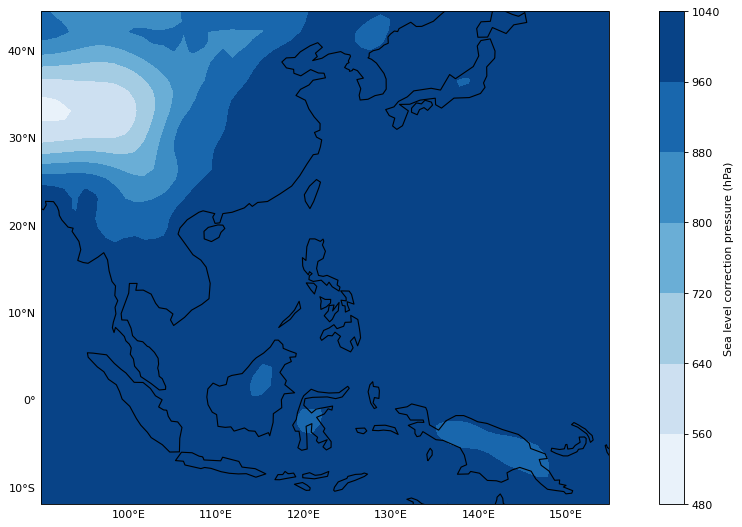

In [5]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

# clevs = [i for i in range(0, 101, 5)]
cmap = cm.Blues
# norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, cmap=cmap)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("Sea level correction pressure (hPa)")

plt.show()
plt.close()